In [492]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [493]:
data=pd.read_csv('Baseball.csv')

In [494]:
df=pd.DataFrame(data)

In [495]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [496]:
df.shape

(30, 17)

The baseball dataset has 30 rows and 17 columns

In [497]:
df.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

There are 16 input variables and W is the output variable

In [498]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

Shows the output variable values and it is discrete in nature and is a regression problem

In [499]:
df['W'].value_counts

<bound method IndexOpsMixin.value_counts of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64>

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


we can see the datatypes of all the input and output variables

# Checking for Null values

In [502]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset

In [503]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Checking for outliers

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

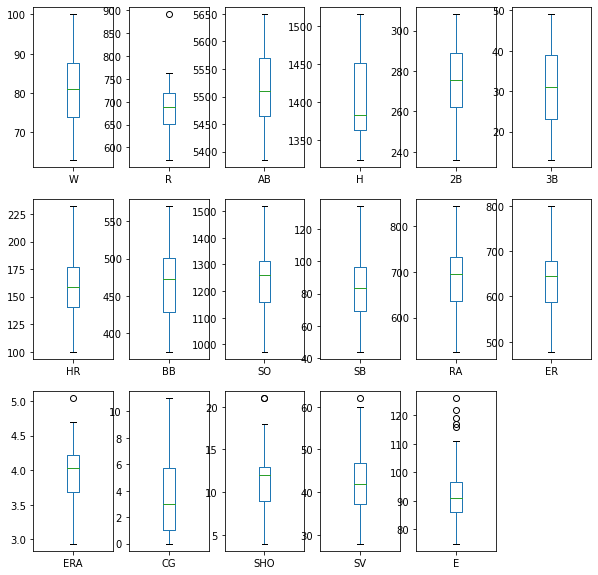

In [504]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

From the above plot we can see that there are outliers in the columns R,ERA,SHO,SV,E

# Checking for skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

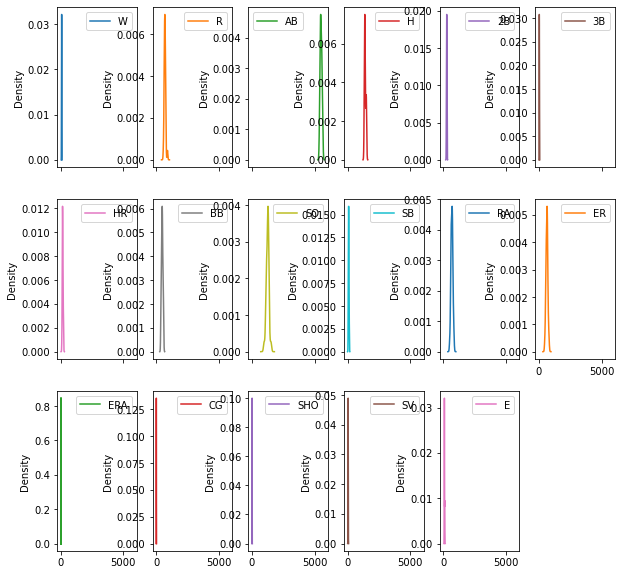

In [505]:
df.plot(kind='kde',subplots=True,layout=(3,6),figsize=(10,10)) 

In [506]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

The above plot and the skew data showa the presence of skewness in the columns R,H,CG,SV,E

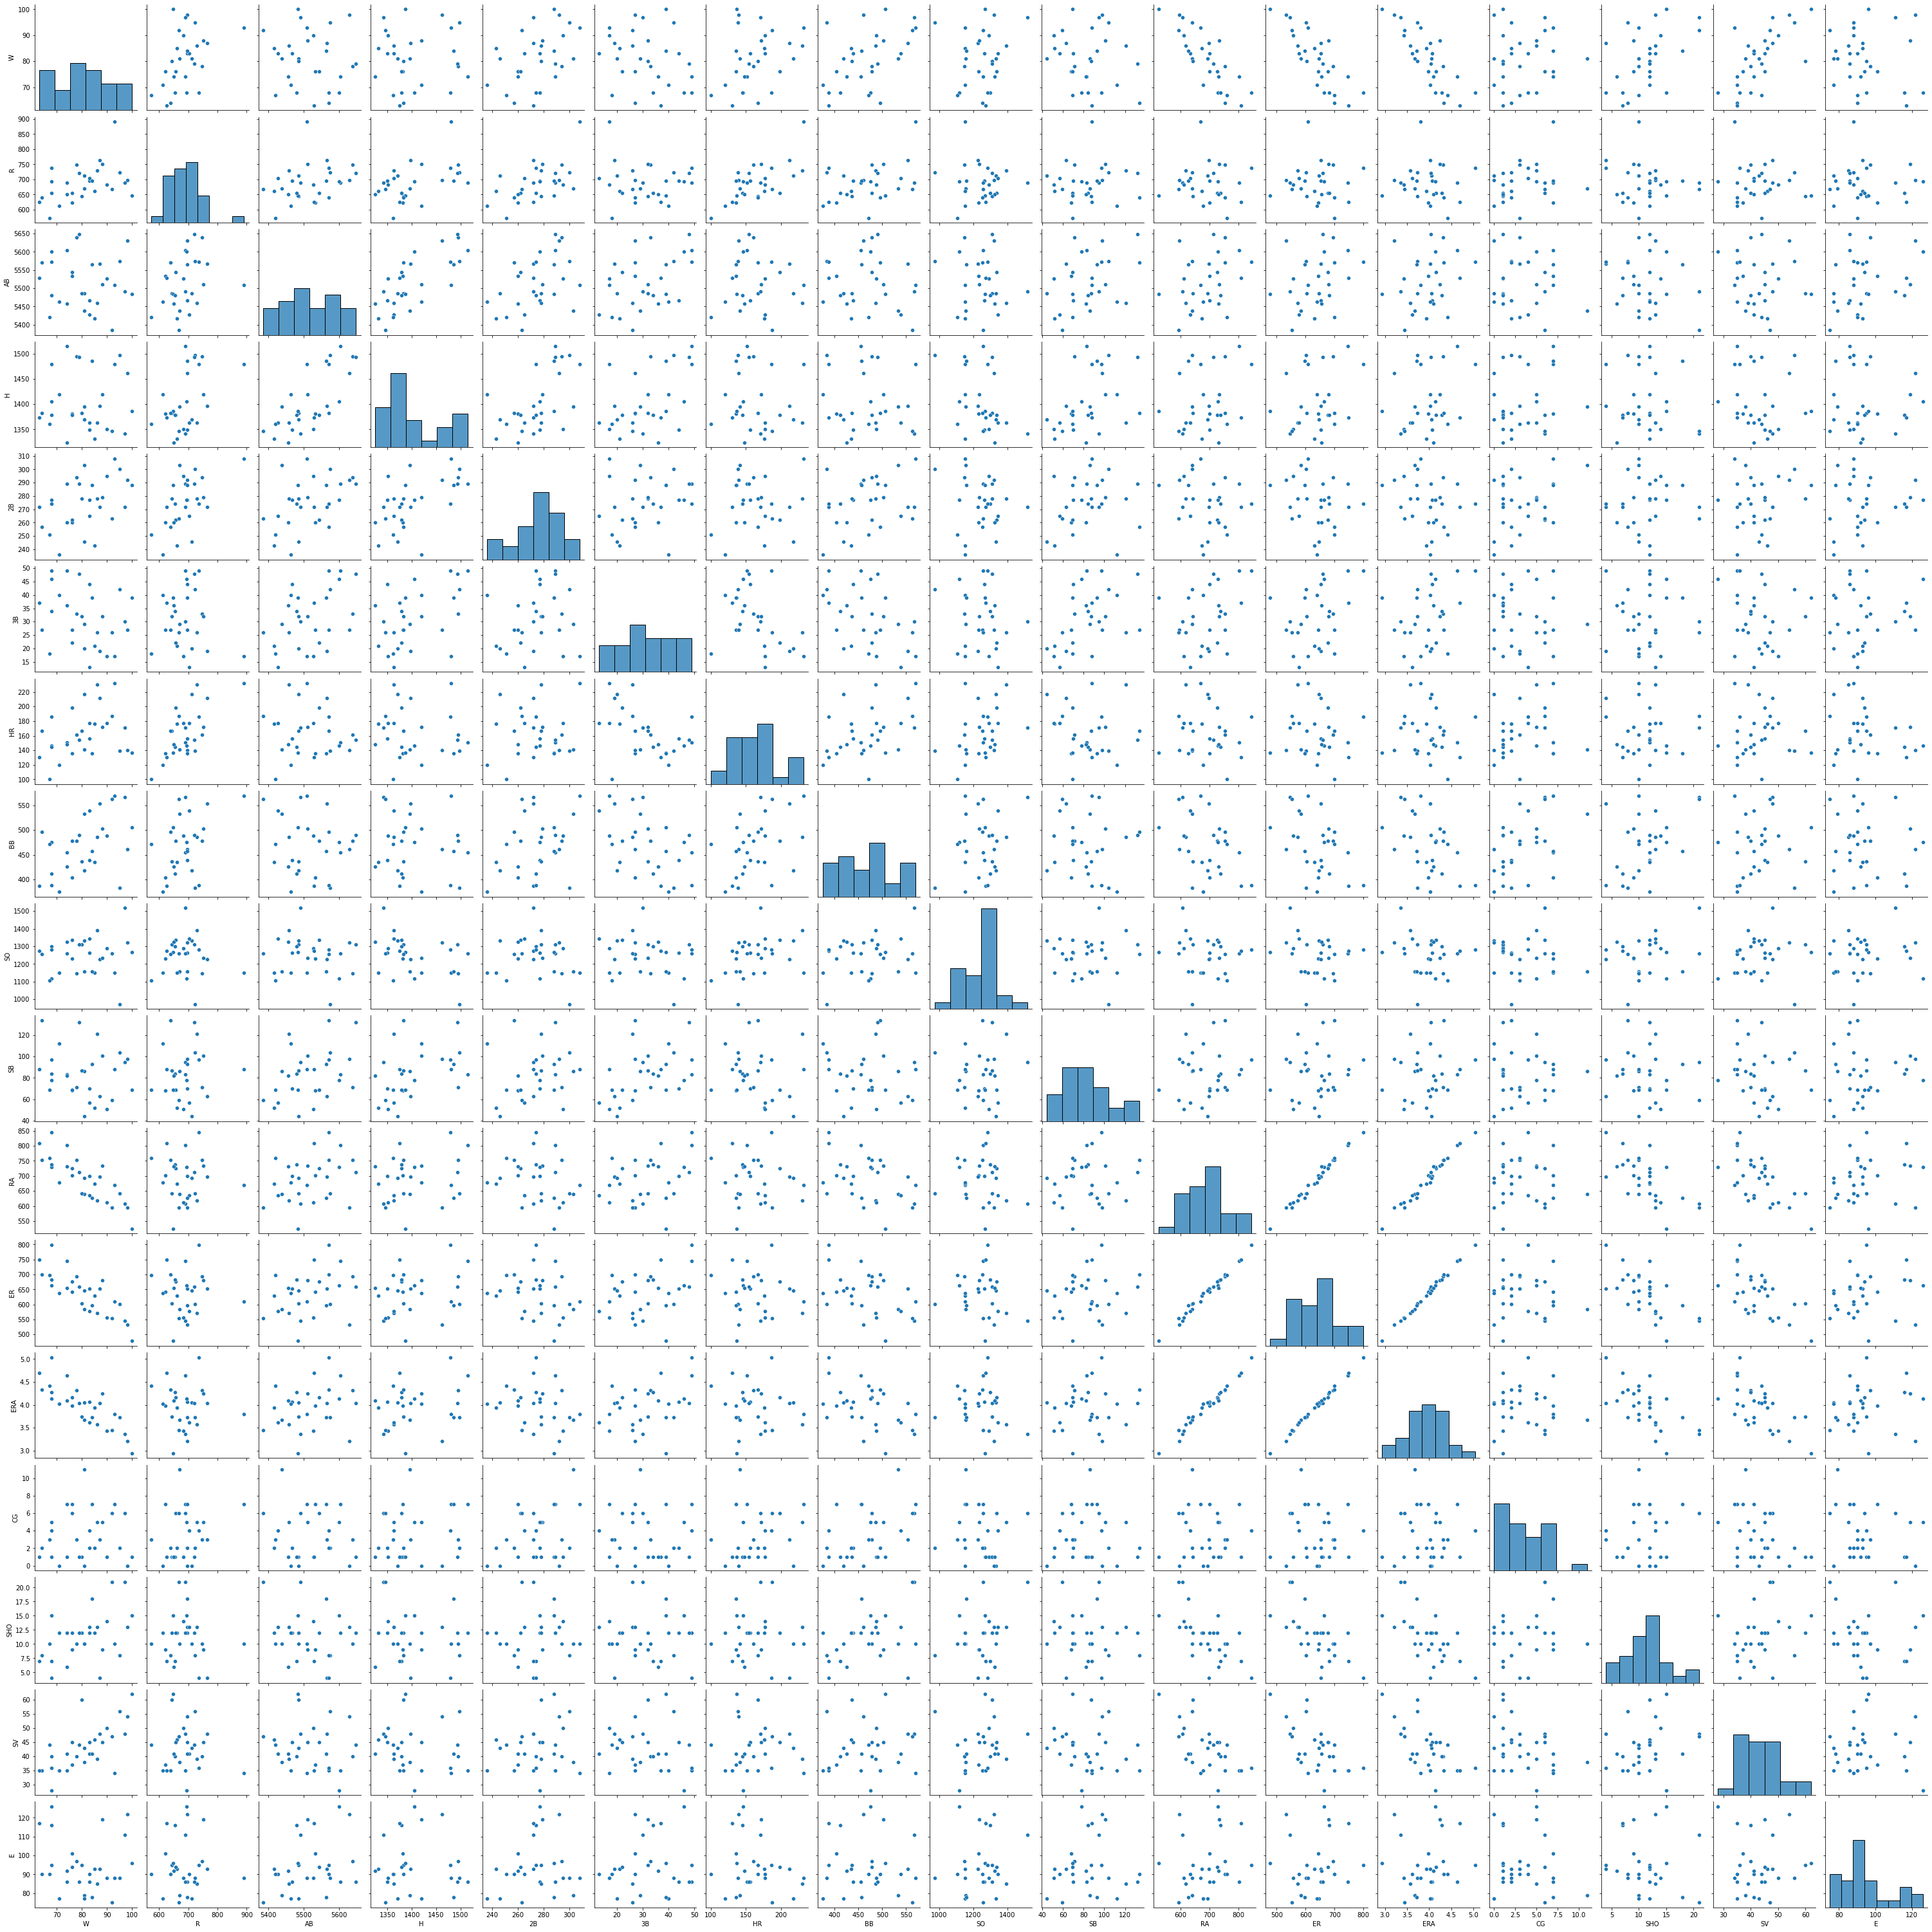

In [330]:
sns.pairplot(df)

The above plot shows the relation between each other columns

# Distribution of runs column

<AxesSubplot:xlabel='R', ylabel='Density'>

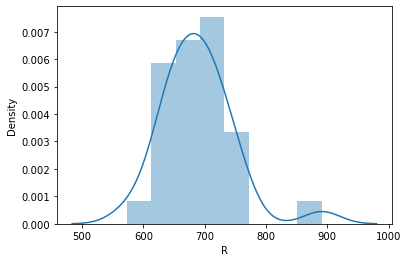

In [425]:
sns.distplot(df['R'])

# Distribution of At Bats

<AxesSubplot:xlabel='AB', ylabel='Density'>

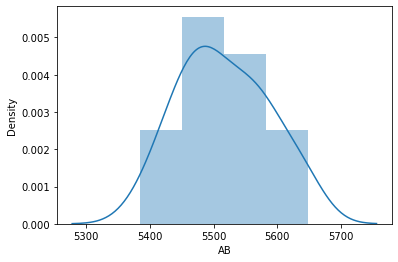

In [426]:
sns.distplot(df['AB'])

# Distribution of Hits

<AxesSubplot:xlabel='H', ylabel='Count'>

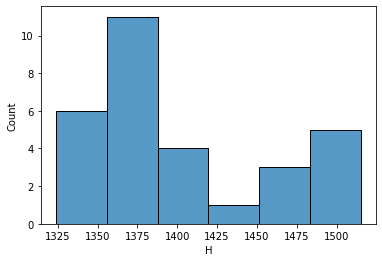

In [427]:
sns.histplot(df['H'])

# dISTRIBUTION OF Doubles

<AxesSubplot:xlabel='2B', ylabel='Density'>

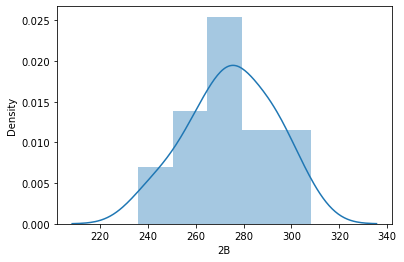

In [428]:
sns.distplot(df['2B'])

# Distribution of earned runs

<AxesSubplot:xlabel='ER', ylabel='Density'>

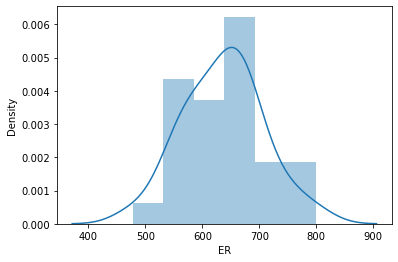

In [429]:
sns.distplot(df['ER'])

# Distribution of runs allowed

<AxesSubplot:xlabel='RA', ylabel='Density'>

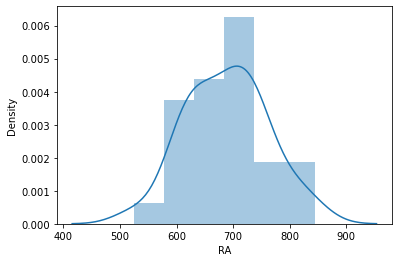

In [430]:
sns.distplot(df['RA'])

# The below plot shows how the output ( Number of predicted wins (W)) varies with Hits

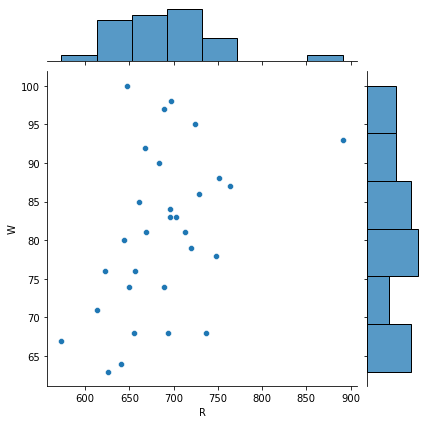

In [431]:
sns.jointplot(data=df,x=df['R'],y=df['W'])

From the above plot we can see the dots in the middle how the target variable(W) varies with input variable(R). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y).

# The below plot shows how the output ( Number of predicted wins (W)) varies with doubles

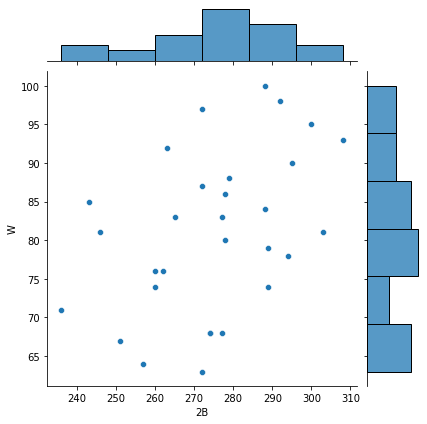

In [432]:
sns.jointplot(data=df,x=df['2B'],y=df['W'])

From the above plot we can see the dots in the middle how the target variable(W) varies with input variable(2B). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y).

<AxesSubplot:xlabel='3B', ylabel='W'>

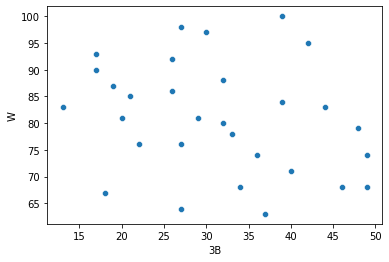

In [433]:
sns.scatterplot(data=df,x=df['3B'],y=df['W'])

The above plot shows the relation between W and 3B.Shows how both are related

<AxesSubplot:xlabel='HR', ylabel='W'>

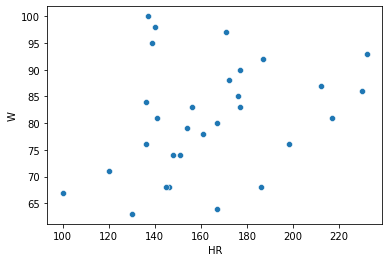

In [434]:
sns.scatterplot(data=df,x=df['HR'],y=df['W'])

The above plot gives the relation between W and HR

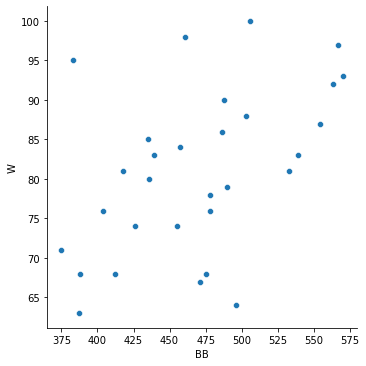

In [435]:
sns.relplot(data=df,x=df['BB'],y=df['W'])

The above plot gives the relation between W and Walks

<AxesSubplot:xlabel='E', ylabel='W'>

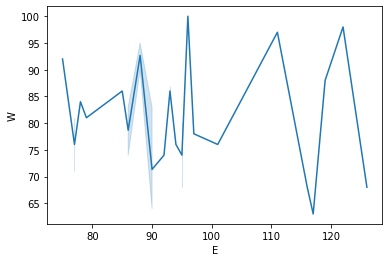

In [436]:
sns.lineplot(data=df,x=df['E'],y=df['W'])

The above plot shows the distribution of the data for the input and output variable

<AxesSubplot:xlabel='W', ylabel='count'>

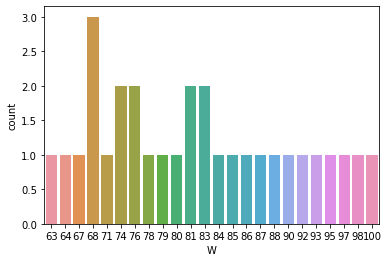

In [437]:
sns.countplot(df['W'])

The above plot shows the distribution of the output variable W.The wins are highest at the 68,74,76,81 & 83 instance

# Removing Outliers

In [507]:
z=np.abs(zscore(df))


In [508]:
df_new=df[(z<3).all(axis=1)]



In [509]:
df.shape

(30, 17)

In [510]:
df_new.shape

(29, 17)

The new dataset has 29 rows after removing the outliers

# checking for multicollinearity

In [511]:
df_new.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


<AxesSubplot:>

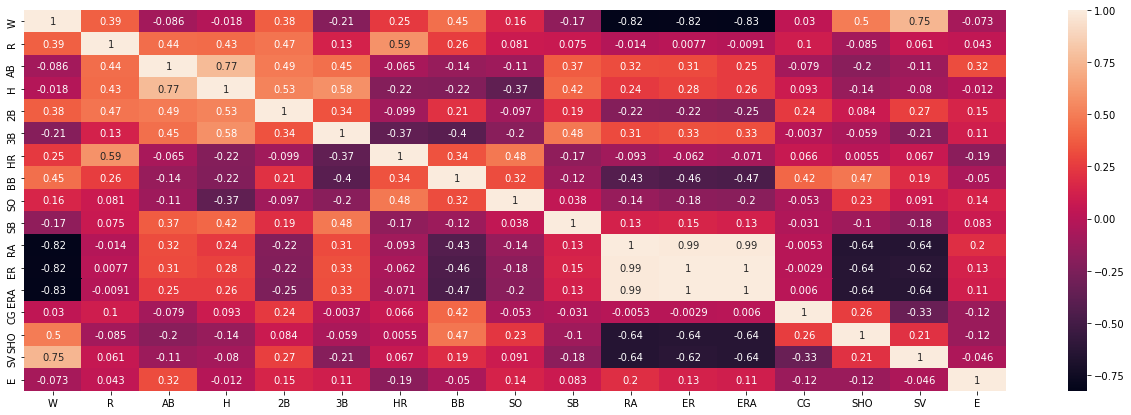

In [512]:
plt.figure(figsize=(22,7))
sns.heatmap(df_new.corr(),annot=True)

From the above heatmap the lighter shades are highly correlated.
Runs allowed(RA) & Earned runs(ER),Earned Run Average (ERA) & Runs allowed(RA),Earned Run Average (ERA) & Earned runs(ER)  are highly correlated,

<function matplotlib.pyplot.show(close=None, block=None)>

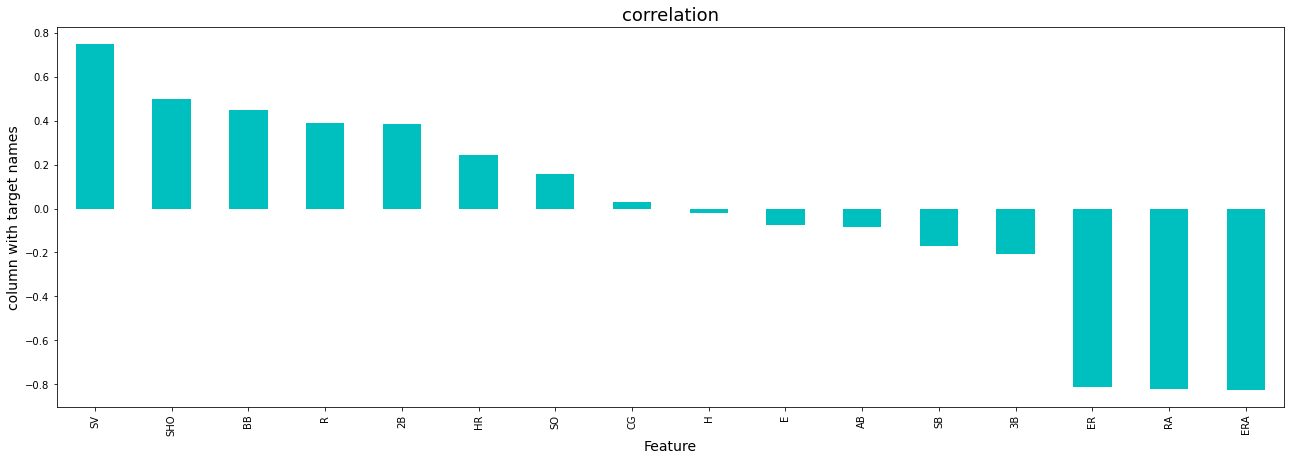

In [513]:
plt.figure(figsize=(22,7))
df_new.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


The above graph shows the positive and negative correlation with output variable W

# Dropping earned runs ER  & ERA Column

In [514]:
x1=df_new.drop(['ER','ERA'],axis=1)

In [515]:
df_BB=x1

In [516]:
df_BB.shape

(29, 15)

The dataset has 29 rows and 15 columns

<function matplotlib.pyplot.show(close=None, block=None)>

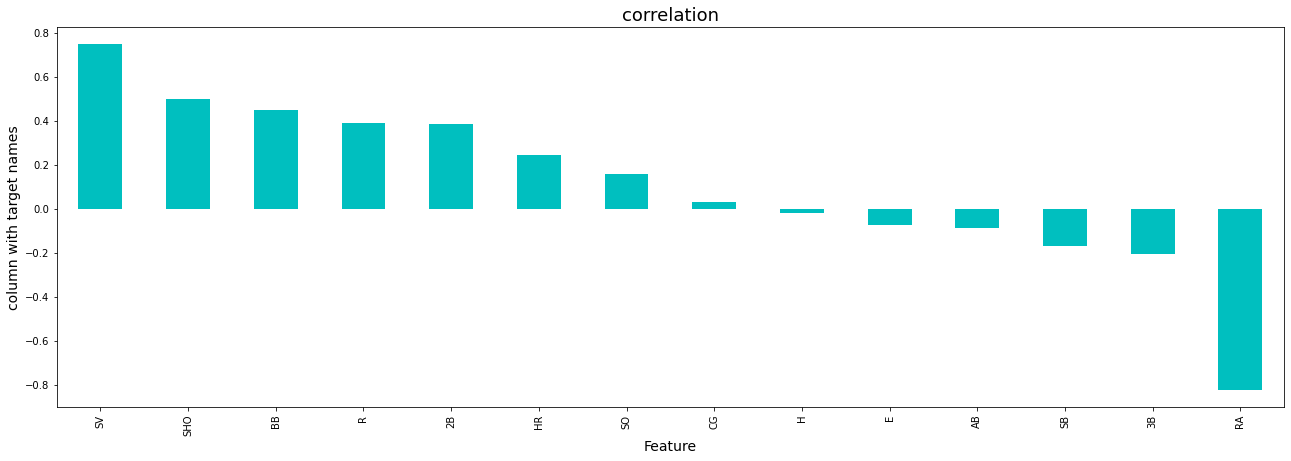

In [517]:
plt.figure(figsize=(22,7))
df_BB.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

In [518]:
x1=df_BB.drop(['SV'],axis=1)

In [519]:
df1=x1

In [520]:
df1.shape

(29, 14)

In [521]:
x=df1.drop('W',axis=1)
y=df1['W']

In [522]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [523]:
calc_vif(x)

,variables,VIF FACTOR
0,R,1393.325758
1,AB,3832.399088
2,H,3593.603694
3,2B,767.450462
4,3B,34.219333
5,HR,176.614032
6,BB,222.535392
7,SO,317.761861
8,SB,23.961337
9,RA,329.649545


# Dropping column H as VIF Factor is very high

In [524]:
x1=df_BB.drop(['AB','H'],axis=1)

In [525]:
calc_vif(x1)

,variables,VIF FACTOR
0,W,771.740645
1,R,2093.535158
2,2B,715.646193
3,3B,31.160469
4,HR,178.312335
5,BB,205.046912
6,SO,324.626640
7,SB,21.324473
8,RA,277.569154
9,CG,6.470094


since the output  is related to Runs not dropping the Runs column

In [526]:
x1.shape

(29, 13)

In [527]:
BB=x1

In [528]:
BB.shape

(29, 13)

the new dataset has 12 columns after removing Collinearity to some extent

# Removing Skewness

In [530]:
BB.skew()

W      0.119013
R     -0.215364
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

From the above we can see that there is skewness in CG & E Columns


In [531]:
x=BB.drop('W',axis=1)
y=BB['W']

# scaling the feature column

In [532]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Model selection

In [533]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# LinearRegression

In [534]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [568]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9384627738051201
At random state 0,the testing accuracy is:- 0.6459591493412808


At random state 1,the training accuracy is:- 0.9097471880067826
At random state 1,the testing accuracy is:- 0.9855048916313162


At random state 2,the training accuracy is:- 0.9206831645631259
At random state 2,the testing accuracy is:- 0.5774396816077205


At random state 3,the training accuracy is:- 0.9245113576032673
At random state 3,the testing accuracy is:- 0.6771762687105007


At random state 4,the training accuracy is:- 0.9340873047189293
At random state 4,the testing accuracy is:- 0.6176832057671207


At random state 5,the training accuracy is:- 0.9353667231128376
At random state 5,the testing accuracy is:- 0.7525915897069693


At random state 6,the training accuracy is:- 0.9301978481120879
At random state 6,the testing accuracy is:- 0.8667995373235641


At random state 7,the training accuracy is:- 0.9328211456776182
At random state 7,the testing acc

At random state 66,the testing accuracy is:- 0.8325046638438728


At random state 67,the training accuracy is:- 0.9398235934131375
At random state 67,the testing accuracy is:- 0.8277231153130187


At random state 68,the training accuracy is:- 0.9325682117808354
At random state 68,the testing accuracy is:- 0.771929293124697


At random state 69,the training accuracy is:- 0.9189783685782895
At random state 69,the testing accuracy is:- 0.9065178843046304


At random state 70,the training accuracy is:- 0.9426184883102973
At random state 70,the testing accuracy is:- -0.122404763848174


At random state 71,the training accuracy is:- 0.9739870275002854
At random state 71,the testing accuracy is:- -7.628400910920416


At random state 72,the training accuracy is:- 0.9338210274008689
At random state 72,the testing accuracy is:- -1.9563189919348076


At random state 73,the training accuracy is:- 0.9334927712844068
At random state 73,the testing accuracy is:- 0.8233492254874378


At random state 7

At random state 47 the accuracy is almost 93%

In [545]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=47)

In [546]:
lr.fit(x_train,y_train)

LinearRegression()

In [547]:
pred_test=lr.predict(x_test)

In [548]:
pred_test

array([97.99341248, 73.70885472, 71.13783584, 82.81913451, 76.85200047,
       61.55336232])

In [549]:
print(r2_score(y_test,pred_test))

0.954712715925345


In [567]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.26806613796790446

The r2 score is 95% for Linear regression

In [550]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [552]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [554]:
Rid = Ridge(alpha=10,random_state=0)
Rid.fit(x_train,y_train)
Rid.score(x_train,y_train)
pred_Rid = Rid.predict(x_test)

Ridg = r2_score(y_test,pred_Rid)
Ridg

0.8079884846370522

The r2 score for Ridge regressor is 80

In [555]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.28807610912734033

In [556]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [557]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.9226539099454761

The r2 score for Lasso is 92

In [558]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.37333159316273884

In [559]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor

In [560]:
parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters) 
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [561]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 75.25818661971833
Cross Val Score: -72.87748066155035


The r2 score for RFC is 75%

# Since the r2 score for Linear regressor is 95% ,Linear regressor is the best model